In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic Acid']

In [6]:
df.head()

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [7]:
df.shape

(178, 3)

<Axes: xlabel='Alcohol', ylabel='Density'>

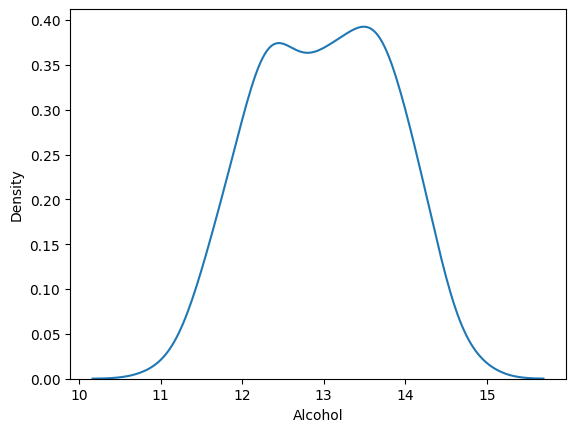

In [8]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

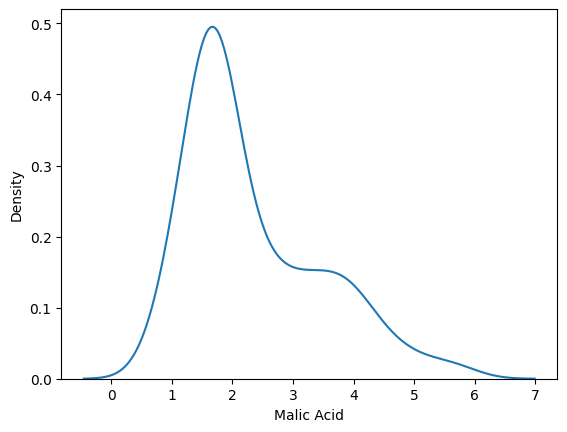

In [10]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

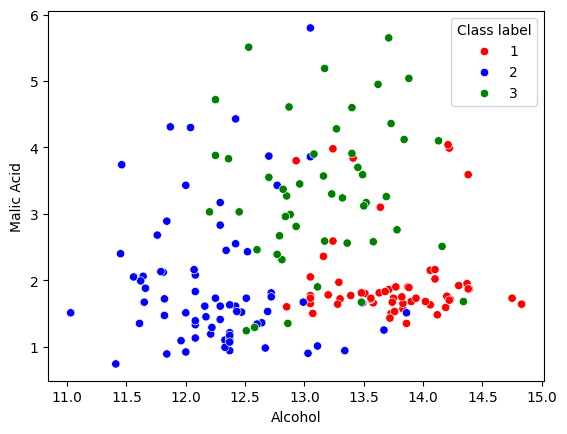

In [16]:
color_dict = {1:'red', 2:'blue',3:'green'}
sns.scatterplot(x=df['Alcohol'], y=df['Malic Acid'], hue=df['Class label'], palette=color_dict)

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('Class label', axis=1)
y = df['Class label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set , it will learn the parameters
scaler.fit(X_train)

# transform train and test sets 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# convert numerical data into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [25]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [26]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


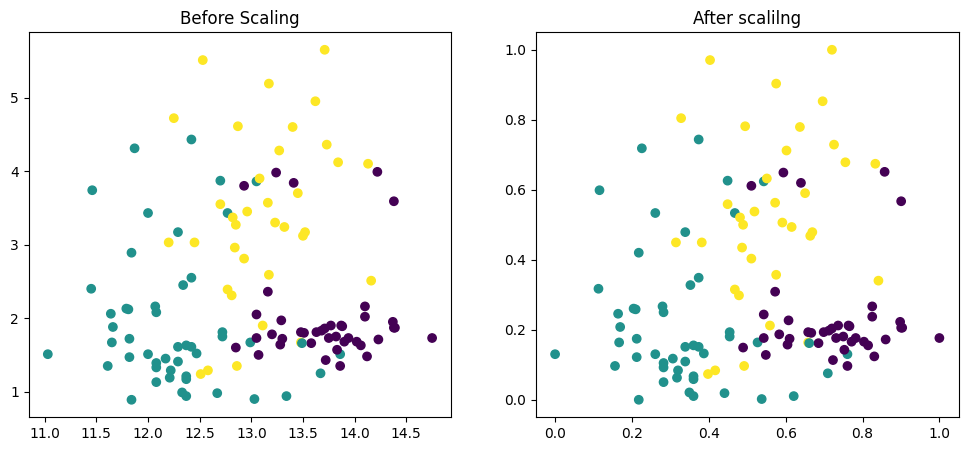

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Before Scaling')
ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'], c=y_train)

ax2.set_title('After scalilng')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'], c=y_train)

plt.show()

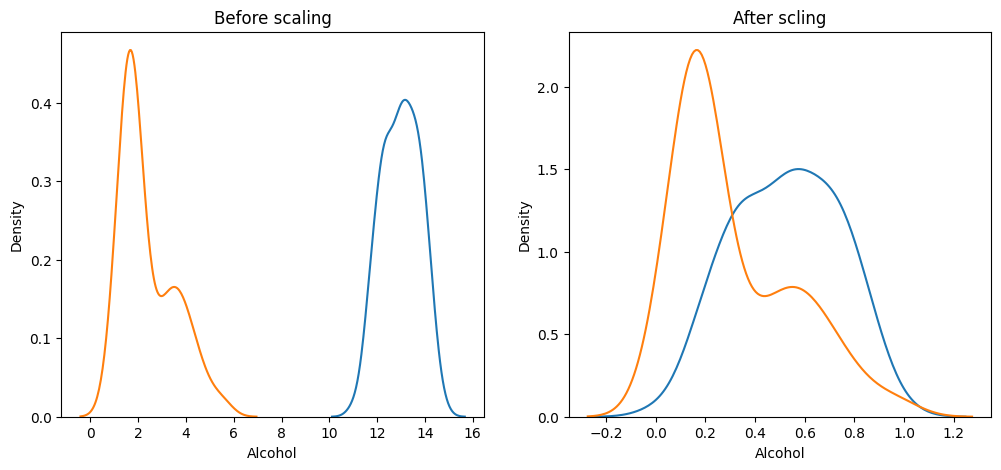

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title('Before scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('After scling')
sns.kdeplot(X_train_scaled['Alcohol'])
sns.kdeplot(X_train_scaled['Malic Acid'])

plt.show()

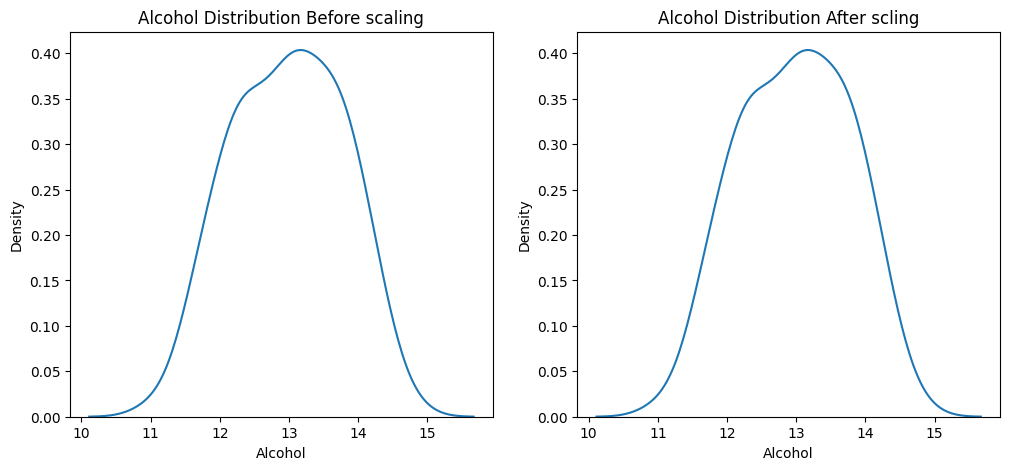

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title('Alcohol Distribution Before scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After scling')
sns.kdeplot(X_train['Alcohol'], ax=ax2)

plt.show()

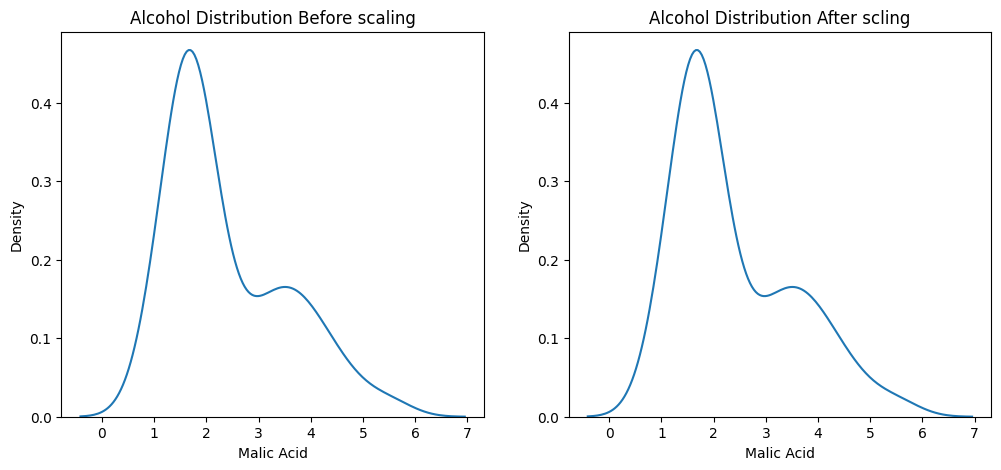

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title('Alcohol Distribution Before scaling')
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After scling')
sns.kdeplot(X_train['Malic Acid'], ax=ax2)

plt.show()